In [14]:
# EJERCICIO 1

In [1]:
# 1. Check if your country is a polygon or multipolygon.

In [1]:
import os


import geopandas as gpd
from  fiona import listlayers

#mapa
canadamaps='maps/canadaMaps.gpkg'

#layers in maps
listlayers(canadamaps)

['countries', 'cities', 'rivers']

In [2]:
canada=gpd.read_file(canadamaps,layer='countries')
canada_cities=gpd.read_file(canadamaps,layer='cities')
canada_rivers=gpd.read_file(canadamaps,layer='rivers')

In [3]:
canada

,COUNTRY,geometry
0,Canada,"MULTIPOLYGON (((385323.172 23951253.091, 38663..."


In [4]:
# 2. Recover just the boundaries of that country.

<Axes: >

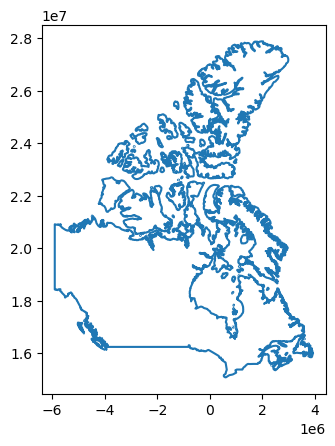

In [5]:
canada.boundary.plot()

In [6]:
# 3. Turn the boundary into a GDF

In [7]:
type(canada.boundary)

geopandas.geoseries.GeoSeries

In [8]:
canada.boundary.to_frame()

,0
0,"MULTILINESTRING ((385323.172 23951253.091, 386..."


In [9]:
# conversion
canada_border=canada.boundary.to_frame() 

# new column (optional)
canada_border['name']='Canada' 

# renaming the geometry column
canada_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
canada_border = canada_border.set_geometry("geometry")

# verifying:

new_crs = "EPSG:3978"
# Cambia el CRS del GeoDataFrame
canada = canada.to_crs(new_crs)
canada_cities = canada_cities.to_crs(new_crs)
canada_rivers = canada_rivers.to_crs(new_crs)

# Ahora, gdf tiene el nuevo CRS
canada_border.crs

<Projected CRS: EPSG:5641>
Name: SIRGAS 2000 / Brazil Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - offshore - equatorial margin.
- bounds: (-51.64, -5.74, -32.43, 7.04)
Coordinate Operation:
- name: Petrobras Mercator
- method: Mercator (variant B)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
canada_border

,geometry,name
0,"MULTILINESTRING ((385323.172 23951253.091, 386...",Canada


In [11]:
# EJERCICIO 2

In [12]:
# 1. Look for sub administrative divisions of your country
# 2. Check all the CRSs of those divisions
# 3. If you find one CRS is missing, fill the CRS with the right projection.

In [13]:
canada.crs.to_epsg()==canada_cities.crs.to_epsg()==canada_rivers.crs.to_epsg()

True

In [14]:
canada.crs

<Projected CRS: EPSG:3978>
Name: NAD83 / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
canada_cities.crs

<Projected CRS: EPSG:3978>
Name: NAD83 / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
canada_rivers.crs

<Projected CRS: EPSG:3978>
Name: NAD83 / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [17]:
# EJERCICIO 3

# 1. Look for some points in a CSV file about your country.

# 2. Turn those points into a spatial object.

# 3. Save the layer.

In [18]:
import pandas as pd
import os

info_avion= pd.read_csv(os.path.join("data", "canada_a2.csv"), encoding='latin1')
info_avion

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,1990,CYYZ,large_airport,Toronto Lester B. Pearson International Airport,43.6772,-79.6306,569,NaN,Canada,CA,...,Toronto,1,CYYZ,YYZ,YYZ,http://www.gtaa.com/,https://en.wikipedia.org/wiki/Toronto_Pearson_...,"YTO, Toronto International Airport, Malton",1040275,2023-05-11T14:58:13+00:00
2,1941,CYVR,large_airport,Vancouver International Airport,49.193901062,-123.183998108,14,NaN,Canada,CA,...,Vancouver,1,CYVR,YVR,NaN,http://www.yvr.ca/,https://en.wikipedia.org/wiki/Vancouver_Intern...,NaN,1018875,2013-07-22T11:09:16+00:00
3,1928,CYUL,large_airport,Montreal / Pierre Elliott Trudeau Internationa...,45.4706001282,-73.7407989502,118,NaN,Canada,CA,...,MontrÃ©al,1,CYUL,YUL,YUL,http://www.admtl.com/passager/Home.aspx,https://en.wikipedia.org/wiki/Montr%C3%A9al-Pi...,"YMQ, Dorval Airport",51875,2014-03-16T22:14:44+00:00
4,1973,CYYC,large_airport,Calgary International Airport,51.113899231,-114.019996643,3557,NaN,Canada,CA,...,Calgary,1,CYYC,YYC,NaN,http://www.calgaryairport.com/,https://en.wikipedia.org/wiki/Calgary_Internat...,McCall Field,51275,2014-03-18T23:08:53+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,509083,CA-0872,closed,Cow Creek Airport,42.98434,-82.20114,643,NaN,Canada,CA,...,Wyoming,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-05-25T03:06:48+00:00
3077,320714,CA-0659,closed,Yahk Aerodrome,49.109,-116.0598,2870,NaN,Canada,CA,...,Yahk,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-11-23T12:47:24+00:00
3078,39705,CA-0059,closed,Brazeau Airport,52.967817,-115.86737,NaN,NaN,Canada,CA,...,Yellowhead,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-02-18T17:19:40+00:00
3079,40067,CA-0421,closed,E C Air Airport,51.53614,-111.19324,NaN,NaN,Canada,CA,...,Youngstown,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-12-03T06:44:57+00:00


In [20]:
# bye first row 
info_avion.drop(index=0,inplace=True)
info_avion.reset_index(drop=True, inplace=True)

# keep the  columns needed
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
info_avion=info_avion.loc[:,keep]
info_avion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079 entries, 0 to 3078
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3079 non-null   object
 1   type           3079 non-null   object
 2   latitude_deg   3079 non-null   object
 3   longitude_deg  3079 non-null   object
 4   elevation_ft   2560 non-null   object
 5   region_name    3079 non-null   object
 6   municipality   2513 non-null   object
dtypes: object(7)
memory usage: 168.5+ KB


In [24]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
info_avion[numericCols]=info_avion.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
info_avion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079 entries, 0 to 3078
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3079 non-null   object 
 1   type           3079 non-null   object 
 2   latitude_deg   3079 non-null   float64
 3   longitude_deg  3079 non-null   float64
 4   elevation_ft   2560 non-null   float64
 5   region_name    3079 non-null   object 
 6   municipality   2513 non-null   object 
dtypes: float64(3), object(4)
memory usage: 168.5+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

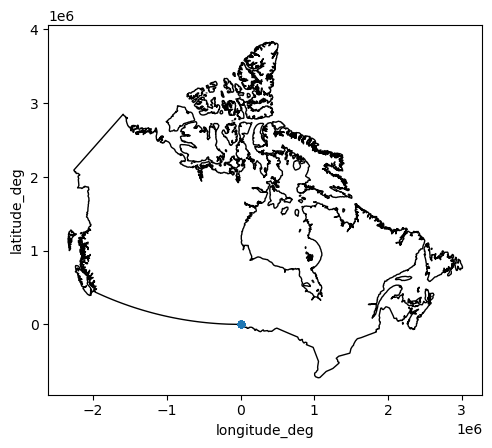

In [25]:
# let's plot

base = canada.plot(color='white', edgecolor='black') #unprojected

info_avion.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [27]:
avion=gpd.GeoDataFrame(data=info_avion.copy(),
                 geometry=gpd.points_from_xy(info_avion.longitude_deg,
                                             info_avion.latitude_deg), 
                 crs=4326)# the coordinates were in degrees - unprojected

In [28]:
avion = avion.to_crs(3978)

<Axes: >

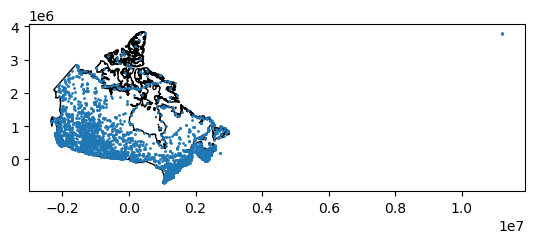

In [29]:
# let's plot

base = canada.plot(color='white', edgecolor='black')
avion.plot(ax=base,markersize=1)

In [30]:
# EJERCICIO 4

# Compute the centroid of your country.

# Combine all the polygons to the north, and also all the polygons to the south; use unary union.

# Detect the amount of duplicates after the combination.

# Plot both maps so that duplicates appear.

In [31]:
centroCanada=canada.centroid
centroCanada

0    POINT (-60310.404 1250285.721)
dtype: geometry

In [32]:
type(centroCanada.x[0]),type(centroCanada.y[0])

(numpy.float64, numpy.float64)

In [33]:
canada_states=gpd.read_file(os.path.join("maps","gpr_000b11a_e","canvec_1M_CA_Admin","geo_political_region_2.shp"))

In [34]:
canada_states.crs

<Geographic 2D CRS: GEOGCS["GCS_North_American_1983_CSRS98",DATUM["D_N ...>
Name: GCS_North_American_1983_CSRS98
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: D_North_American_1983_CSRS98
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

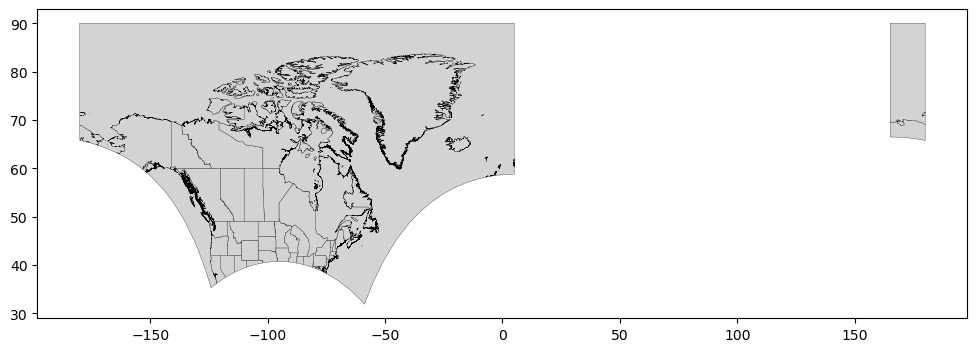

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))

canada_states.plot(ax=ax, facecolor='lightgrey', edgecolor='black', linewidth=0.2)

plt.show()

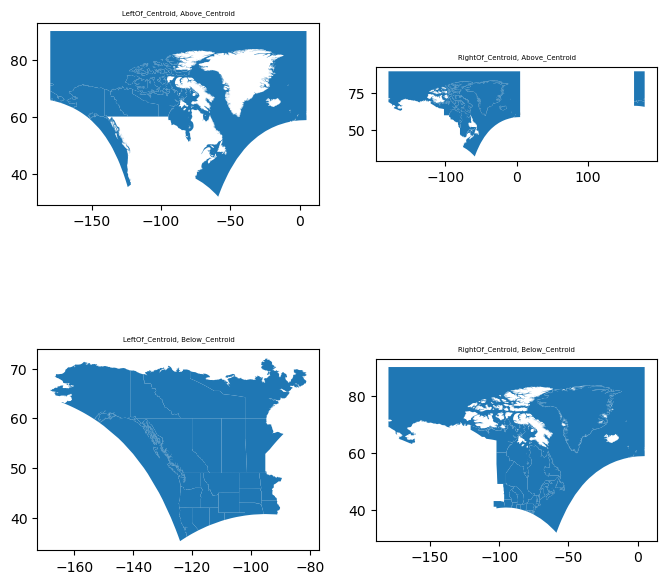

In [36]:
# Asegúrate de que los centroides estén en el mismo CSR que canada_states
centroCanada = centroCanada.to_crs(epsg=4269)

# Crea la figura y los ejes
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(8, 8))


centroidX=centroCanada.x[0]
centroidY=centroCanada.y[0]

axs[0,0].set_title('LeftOf_Centroid, Above_Centroid',fontsize=5)
canada_states.cx[:centroidX,centroidY:].plot(ax=axs[0,0]) 

axs[0,1].set_title('RightOf_Centroid, Above_Centroid',fontsize=5)
canada_states.cx[centroidX:,centroidY:].plot(ax=axs[0,1]) 

axs[1,0].set_title('LeftOf_Centroid, Below_Centroid',fontsize=5)
canada_states.cx[:centroidX,:centroidY].plot(ax=axs[1,0]) 

axs[1,1].set_title('RightOf_Centroid, Below_Centroid',fontsize=5)
canada_states.cx[centroidX:,:centroidY].plot(ax=axs[1,1]) ;

In [37]:
##############################################################################################################

<Axes: title={'center': 'LeftOf_Centroid'}>

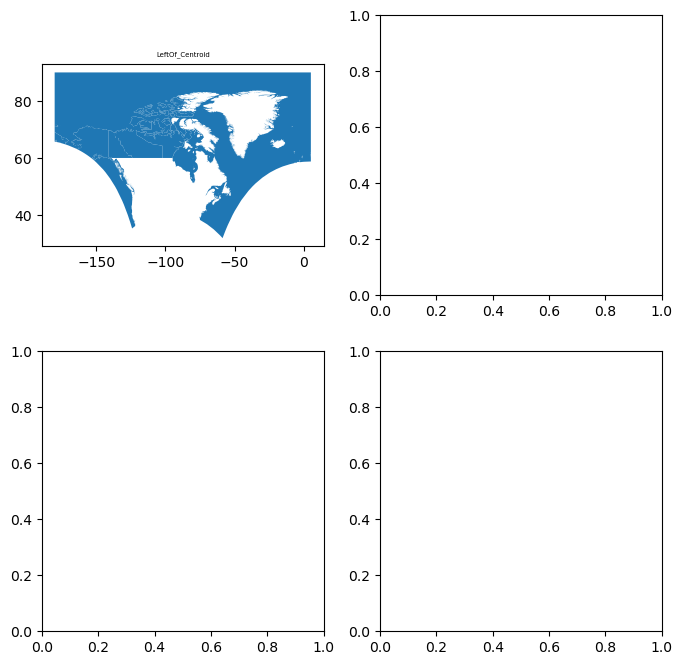

In [38]:
# Asegúrate de que los centroides estén en el mismo CSR que canada_states
centroCanada = centroCanada.to_crs(epsg=4269)

# Crea la figura y los ejes
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(8, 8))


centroidX=centroCanada.x[0]
centroidY=centroCanada.y[0]

axs[0,0].set_title('LeftOf_Centroid',fontsize=5)
canada_states.cx[:centroidX,centroidY:].plot(ax=axs[0,0]) 


<Axes: title={'center': 'Above_Centroid'}>

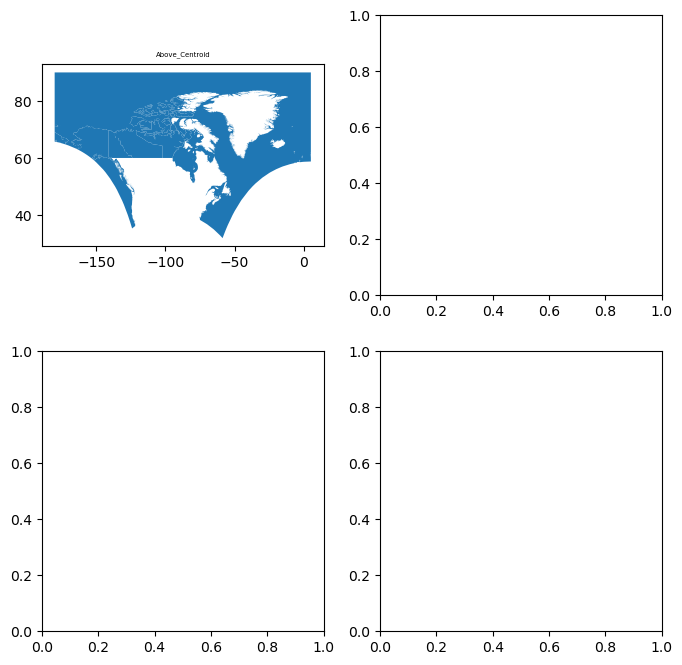

In [39]:
# Asegúrate de que los centroides estén en el mismo CSR que canada_states
centroCanada = centroCanada.to_crs(epsg=4269)

# Crea la figura y los ejes
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(8, 8))


centroidX=centroCanada.x[0]
centroidY=centroCanada.y[0]

axs[0,0].set_title('Above_Centroid',fontsize=5)
canada_states.cx[:centroidX,centroidY:].plot(ax=axs[0,0]) 


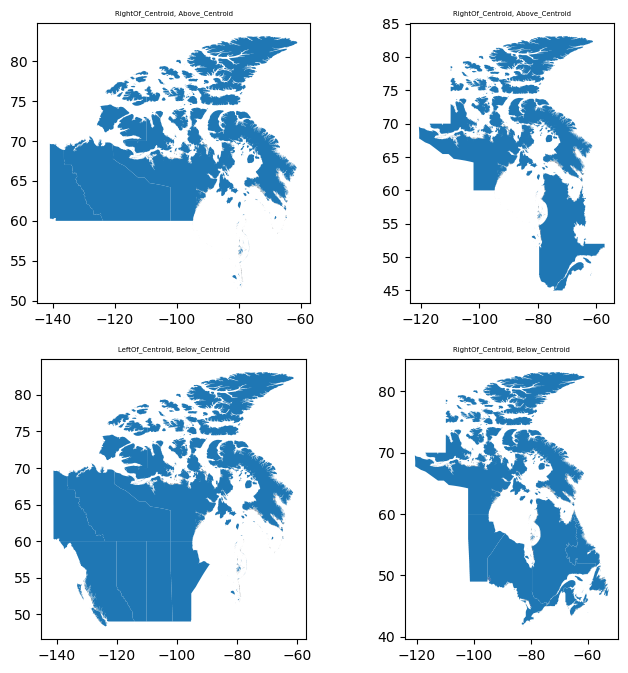

In [206]:
# Asegúrate de que los centroides estén en el mismo CSR que canada_states
centroCanada = centroCanada.to_crs(epsg=4269)

# Crea la figura y los ejes
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(8, 8))


centroidX=centroCanada.x[0]
centroidY=centroCanada.y[0]

axs[0,0].set_title('RightOf_Centroid, Above_Centroid',fontsize=5)
canada_states.cx[:centroidX,centroidY:].plot(ax=axs[0,0]) 

axs[0,1].set_title('RightOf_Centroid, Above_Centroid',fontsize=5)
canada_states.cx[centroidX:,centroidY:].plot(ax=axs[0,1]) 

axs[1,0].set_title('LeftOf_Centroid, Below_Centroid',fontsize=5)
canada_states.cx[:centroidX,:centroidY].plot(ax=axs[1,0]) 

axs[1,1].set_title('RightOf_Centroid, Below_Centroid',fontsize=5)
canada_states.cx[centroidX:,:centroidY].plot(ax=axs[1,1]) ;

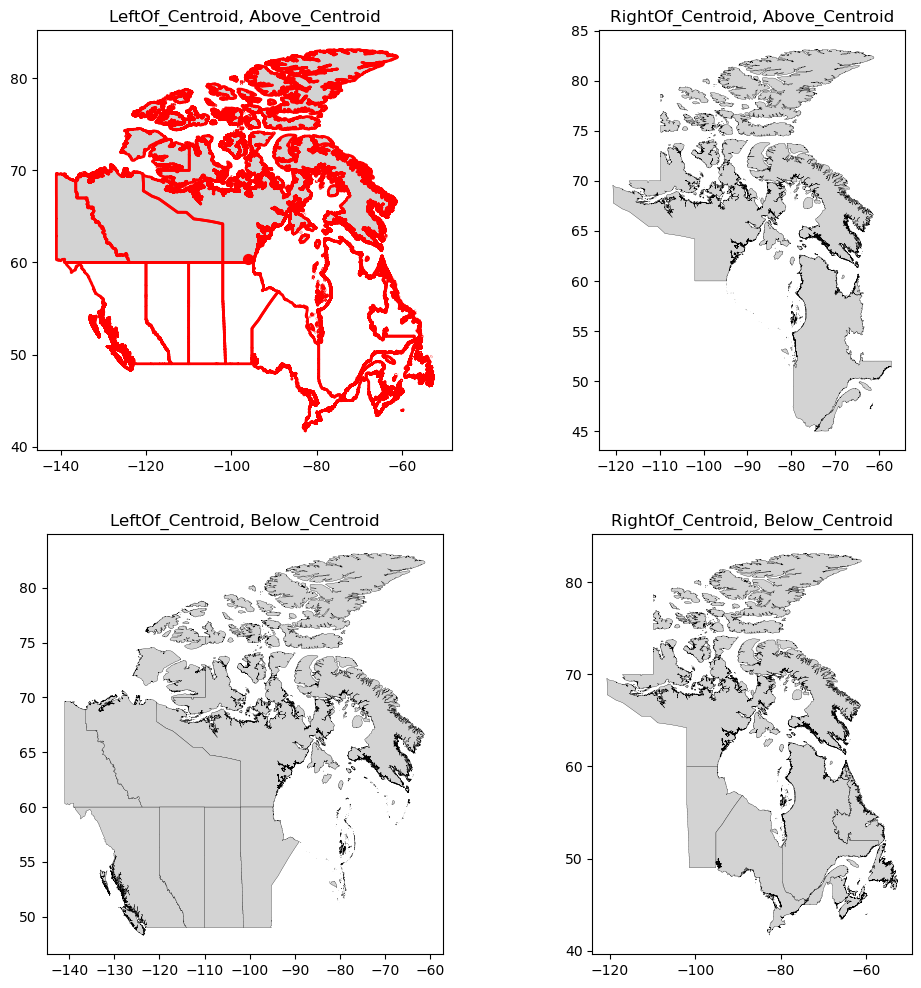

In [204]:
import matplotlib.pyplot as plt

# Asegúrate de que los centroides estén en el mismo CSR que canada_states
centroCanada = centroCanada.to_crs(epsg=4269)

# Calcula el centroide después de la transformación de coordenadas
centroidX = centroCanada.geometry.x[0]
centroidY = centroCanada.geometry.y[0]

# Crea la figura y los ejes
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(12, 12))

axs[0, 0].set_title('LeftOf_Centroid, Above_Centroid', fontsize=12)
canada_states.cx[:centroidX, centroidY:].plot(ax=axs[0, 0], facecolor='lightgrey', edgecolor='black', linewidth=0.2)

axs[0, 1].set_title('RightOf_Centroid, Above_Centroid', fontsize=12)
canada_states.cx[centroidX:, centroidY:].plot(ax=axs[0, 1], facecolor='lightgrey', edgecolor='black', linewidth=0.2)

axs[1, 0].set_title('LeftOf_Centroid, Below_Centroid', fontsize=12)
canada_states.cx[:centroidX, :centroidY].plot(ax=axs[1, 0], facecolor='lightgrey', edgecolor='black', linewidth=0.2)

axs[1, 1].set_title('RightOf_Centroid, Below_Centroid', fontsize=12)
canada_states.cx[centroidX:, :centroidY].plot(ax=axs[1, 1], facecolor='lightgrey', edgecolor='black', linewidth=0.2)

# Muestra el mapa general con el centroide marcado
canada_states.plot(ax=axs[0, 0], facecolor='none', edgecolor='red', linewidth=2)
axs[0, 0].scatter(centroidX, centroidY, color='red', s=50, label='Centroide')

plt.show()

In [ ]:
#########################################################################################################################3

In [89]:
# EJERCICIO 5

# Select some points from your maps.

# Create the convex hull for those points.

# Turn the hull into a GDF.

# Plot the hull on top of the country.

In [111]:
# para ver que tipos de aeropuestos hay

avion['type'].value_counts()

type
small_airport     1080
closed             773
heliport           476
seaplane_base      408
medium_airport     329
large_airport       13
balloonport          1
Name: count, dtype: int64

In [115]:
# otro nombre para columnas

avion.rename(columns={'type':'kind'},inplace=True)

In [117]:
canada_AirTopLeft=avion[avion.kind=='small_airport'].cx[:centroidX,centroidY:]
canada_AirTopRight=avion[avion.kind=='small_airport'].cx[centroidX:,centroidY:]
canada_AirBottomLeft=avion[avion.kind=='small_airport'].cx[:centroidX,:centroidY]
canada_AirBottomRight=avion[avion.kind=='small_airport'].cx[centroidX:,:centroidY]

C:\Users\cpauc\AppData\Local\Temp\ipykernel_19928\1774712452.py:1: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  base=canada_AirTopLeft.plot(facecolor='grey', alpha=0.4)


<Axes: >

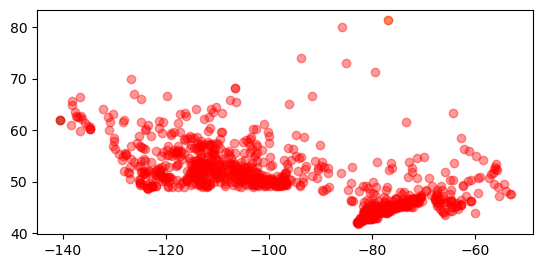

In [118]:
base=canada_AirTopLeft.plot(facecolor='grey', alpha=0.4)
canada_AirTopRight.plot(ax=base,facecolor='orange', alpha=0.4)
canada_AirBottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
canada_AirBottomRight.plot(ax=base,facecolor='red', alpha=0.4)